# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [73]:
import pandas as pd

In [88]:
data = pd.read_csv('train.csv')

In [75]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [89]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=41)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [77]:
train.isna().sum().sum(), test.isna().sum().sum()

(1828, 766)

In [90]:
train = train.fillna("")
test = test.fillna("")
train.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [91]:
train["target"].value_counts()

0    3031
1    2298
Name: target, dtype: int64

In [92]:
train["keyword"].value_counts()[:10]

             46
crush        33
sinking      33
siren        32
fear         31
drowned      31
twister      31
hurricane    31
weapons      30
smoke        30
Name: keyword, dtype: int64

In [93]:
X = ["", 'damage', 'siren', 'wreckage', 'fatalities', 'deluge', 'nuclear%20reactor', 'derail', 'harm', 'tsunami']
Y = []

for name in X:
    Y.append(train[train["keyword"] == name]["target"].sum())


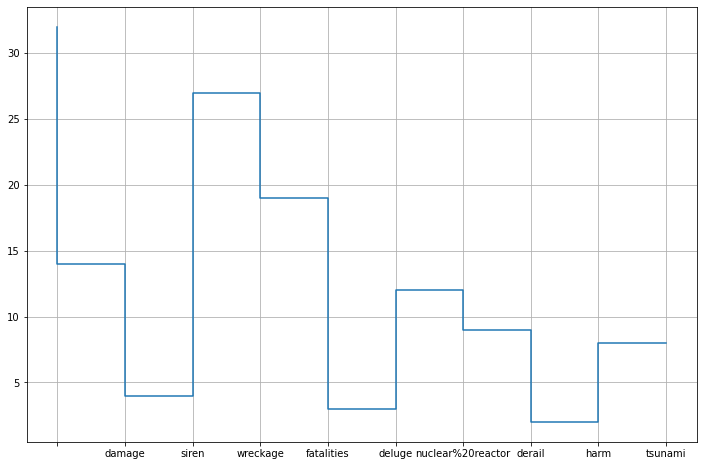

In [94]:
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
 
ax.step(X, Y)
ax.grid()
 
plt.show()

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [95]:
train["full"] = train["keyword"] + train["location"] + train["text"]
train.drop(columns = ["id", "keyword", "location", "text"], inplace = True)

In [96]:
test["full"] = test["keyword"] + test["location"] + test["text"]
test.drop(columns = ["id", "keyword", "location", "text"], inplace = True)

In [87]:
train

,target,full
6714,1,thunderstormJupiter#usNWSgov Severe Weather St...
3054,1,earthquakerzl ?earthquake drill atm
6687,0,thunderEbay Snipe RT? http://t.co/SlQnph34Nt L...
3149,1,emergencyWe are global!SF Asian Women's Shelte...
2630,0,destructionCrackdown 3 Destruction Restricted ...
...,...,...
5200,1,obliteratedTennesseeWACKOS like #MicheleBachma...
4066,1,"forest%20firesVancouver, BCForest fires could ..."
3980,1,"floodingKualar Lumpur, MalaysiaMonsoon Floodin..."
931,0,"blown%20upSt Paul, MN@libraryeliza he did get ..."


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [100]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train["full"])
X.toarray().shape

(5329, 22695)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [101]:
cnt_vec.vocabulary_.keys()

dict_keys(['thunderstormjupiter', 'usnwsgov', 'severe', 'weather', 'statement', 'issued', 'august', '05', 'at', '10', '38pm', 'edt', 'by', 'nws', 'the', 'thunderstorm', 'warning', 'http', 'co', 'epzgg4uqji', 'earthquakerzl', 'earthquake', 'drill', 'atm', 'thunderebay', 'snipe', 'rt', 'slqnph34nt', 'lego', 'power', 'miners', 'set', '8960', 'thunder', 'driller', 'boxed', 'please', 'favorite', 'amp', 'share', 'emergencywe', 'are', 'global', 'sf', 'asian', 'women', 'shelter', 'crisis', 'line', '415', '751', '0880', 'emergency', 'support', 'services', 'non', 'english', 'speaking', 'children', 'destructioncrackdown', 'destruction', 'restricted', 'to', 'multiplayer', 'crackdown', 'impressed', 'earlier', 'this', 'week', 'with', 'demonstratio', 'gwesgeszxv', 'arsonusathousands', 'attend', 'rally', 'organized', 'peace', 'now', 'protesting', 'arson', 'attack', 'that', 'took', 'life', 'of', 'an', 'bvckd9pdti', 'displacedunited', 'kingdomfor', 'those', 'displaced', 'disasters', 'label', 'and', 'leg

In [102]:
import re
from string import punctuation


def answers(keys):
    q1 = 0
    q2 = 0
    q3 = 0
    
    flag = True
    for key in keys:
        flag = True
        for symbol in key:
            if symbol.isdigit() and flag:
                q1 += 1
                flag = False
            
            
    flag = True          
    for key in keys:
        flag = True
        for symbol in key:
            if (symbol in punctuation) and flag:
                q2 += 1
                flag = False
            
    flag = True          
    for key in keys:
        if (key[0] == "#") or (key[0] == "@"):
            q3 += 1
            
    print(f"Количество слов, содержащих цифры: {q1}")
    print(f"Количество слов, содержащих символы пунктуации: {q2}")
    print(f"Количество упоминаний и хэштегов: {q3}")

answers(cnt_vec.vocabulary_.keys())
# Слов с пунктацией почти нет (только с нижним подчеркиванием (проверено), а хэштегов и упоминай вовсе нет, такой
# токенизатор явно нам не подходит, ведь эта информация действительно важна для текстов из соц сетей)


Количество слов, содержащих цифры: 4594
Количество слов, содержащих символы пунктуации: 317
Количество упоминаний и хэштегов: 0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [103]:
from nltk.tokenize import TweetTokenizer

tw = TweetTokenizer()

cnt_vec_tw = CountVectorizer(tokenizer = tw.tokenize)
X = cnt_vec_tw.fit_transform(train["full"])


answers(cnt_vec_tw.vocabulary_.keys())
#В этом случае появились хэштеги и упоминания, а также сильно увеличилось количество слов содержащих пунктуацию,
# т.к твит токенайзер нацелен на подобные токены, ведь в социальных сетях нередко они очень важны.

Количество слов, содержащих цифры: 4624
Количество слов, содержащих символы пунктуации: 7666
Количество упоминаний и хэштегов: 3184


## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [104]:
from string import punctuation as punct
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [105]:
def is_word_fit(word): 
    zxc = "[" + punct + "]" # Краткость - сестра таланта
    condition_1 = '[a-z]+|'
    condition_2 = '#[a-z]+|'
    condition_3 = zxc + '*[\[\]{}()]' + zxc + "*" 
    if re.fullmatch(condition_1 + condition_2 + condition_3, word):
        return 1
    else:
        return 0

In [106]:
import nltk
from nltk.stem.snowball import SnowballStemmer

def custom_tokenizer(string):
    lower_string = string.lower()
    
    tw = TweetTokenizer()
    words = tw.tokenize(lower_string)
    
    good_words = [word for word in words if is_word_fit(word)]
    
    best_words = [word for word in good_words if word not in nltk.corpus.stopwords.words('english')]
    
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in best_words]
    
    return stemmed_words
  
for i in range(0,10):
    print(custom_tokenizer(train["full"].values[i]))

['thunderstormjupit', '#usnwsgov', 'sever', 'weather', 'statement', 'issu', 'august', 'pm', 'edt', 'nws', 'sever', 'thunderstorm', 'warn']
['earthquakerzl', 'earthquak', 'drill', 'atm']
['thunderebay', 'snipe', 'rt', 'lego', 'power', 'miner', 'set', 'thunder', 'driller', 'box', 'pleas', 'favorit', 'share']
['emergencyw', 'global', 'sf', 'asian', 'shelter', 'crisi', 'line', 'emerg', 'shelter', 'support', 'servic', 'speak', 'asian', 'women', 'children']
['destructioncrackdown', 'destruct', 'restrict', 'multiplay', 'crackdown', 'impress', 'earlier', 'week', 'demonstratio']
['arsonusathousand', 'attend', 'ralli', 'organ', 'peac', 'protest', 'arson', 'attack', 'took', 'life']
['displacedunit', 'kingdomfor', 'displac', 'disast', 'label', 'legal', 'status', 'remain', 'reach']
['fatalitiesla', 'vega', 'top', 'citi', 'run', 'fatal', 'news']
['droughtu', 'record', 'hurrican', 'drought', 'unit', 'state', 'hit', 'major', 'hurrican', 'past', 'nine', 'year', 'seem', 'like']
['electrocutewher', 'supp

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer(tokenizer = custom_tokenizer)
X_train = cnt_vec.fit_transform(train["full"])
X_test = cnt_vec.transform(test["full"])


In [58]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score

clf = LogisticRegression(random_state=42)
clf.fit(X_train, train["target"])
pred = clf.predict(X_test)

f1_score(test["target"], pred)

0.7512142471667566

## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer


tf_idf_vec = TfidfVectorizer(tokenizer = custom_tokenizer, max_df = 0.9, min_df=0.0006)
X_train = tf_idf_vec.fit_transform(train["full"])
X_test = tf_idf_vec.transform(test["full"])
clf = LogisticRegression(random_state=42)
clf.fit(X_train, train["target"])
pred = clf.predict(X_test)
f1_score(test[target], pred)

# После долгого подбора параметра min_df все равно не удалось добиться качество лучше чем у CountVectorizer
# Также стоит отметить, что  max_df равный 0.9 не несет в себе смысла, так тут нет токенов с df больше чем даже 0.1 

0.74835886214442

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [61]:
from sklearn.feature_extraction.text import HashingVectorizer

hash_vec = HashingVectorizer(tokenizer = custom_tokenizer, n_features=5000)
X_train = hash_vec.fit_transform(train["full"])
X_test = hash_vec.transform(test["full"])

clf = LogisticRegression(random_state=42)
clf.fit(X_train, train["target"])
pred = clf.predict(X_test)

f1_score(test["target"], pred)

# Самый высокий результат показал CountVectorizer, однако не стоит забывать, что это также может зависеть, даже от 
# разбиения нашей выборки, ведь значения f1 score с TfidfVectorizer очень близки. А вот HashingVectorizer не очень
# подходит для нашего случая.

/Users/seh9/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7213296398891965

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [109]:
cnt_vec = CountVectorizer(tokenizer = custom_tokenizer)
X_train = cnt_vec.fit_transform(train["full"])
X_test = cnt_vec.transform(test["full"])

clf = LogisticRegression(random_state=42)
clf.fit(X_train, train["target"])
pred = clf.predict(X_test)

f1_score(test["target"], pred)

0.7512142471667566

In [ ]:
# В моем случае f1 score и так достигает нужного значения при использовании CountVectorizer, что не может не 
# радовать!